# Diabetes Regression Exercise

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1. Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.

# 2. Generate training and test sets comprising 80% and 20% of the data respectively.

**Step 1: Load the dataset**

The dataset records various attributes of individuals and their diabetes progression

In [4]:
# Import the dataset
diabetes_df = pd.read_csv("diabetes_dirty.csv")
diabetes_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


**Step 2a: Separate independent (features) and dependent (target) variables**

 X contains all columns except 'PROGRESSION' (which we are trying to predict)

In [5]:
# Independent variables (features)
X = diabetes_df.drop(columns=['PROGRESSION'])

# Dependent variable (target)
y = diabetes_df['PROGRESSION']

**Step 2b: Split data into training and testing sets**

Using 80% for training and 20% for testing to evaluate model generalisation rseed = 23 - Ensures reproducibility of the random split

In [6]:
# Generate training and test sets: 80% train, 20% test
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rseed)

# Show the shape of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

# 3. Investigate the necessity for scaling or normalization of the data. Employ MinMaxScaler and StandardScaler if necessary. Fit these scalers on the training set and apply the fitted scalers to transform both the training and test sets accordingly.

**Step 3a: Visualise feature distributions and relationships (excluding target)**

This pairplot helps us understand feature interactions and distributions,and whether scaling is necessary based on feature ranges.

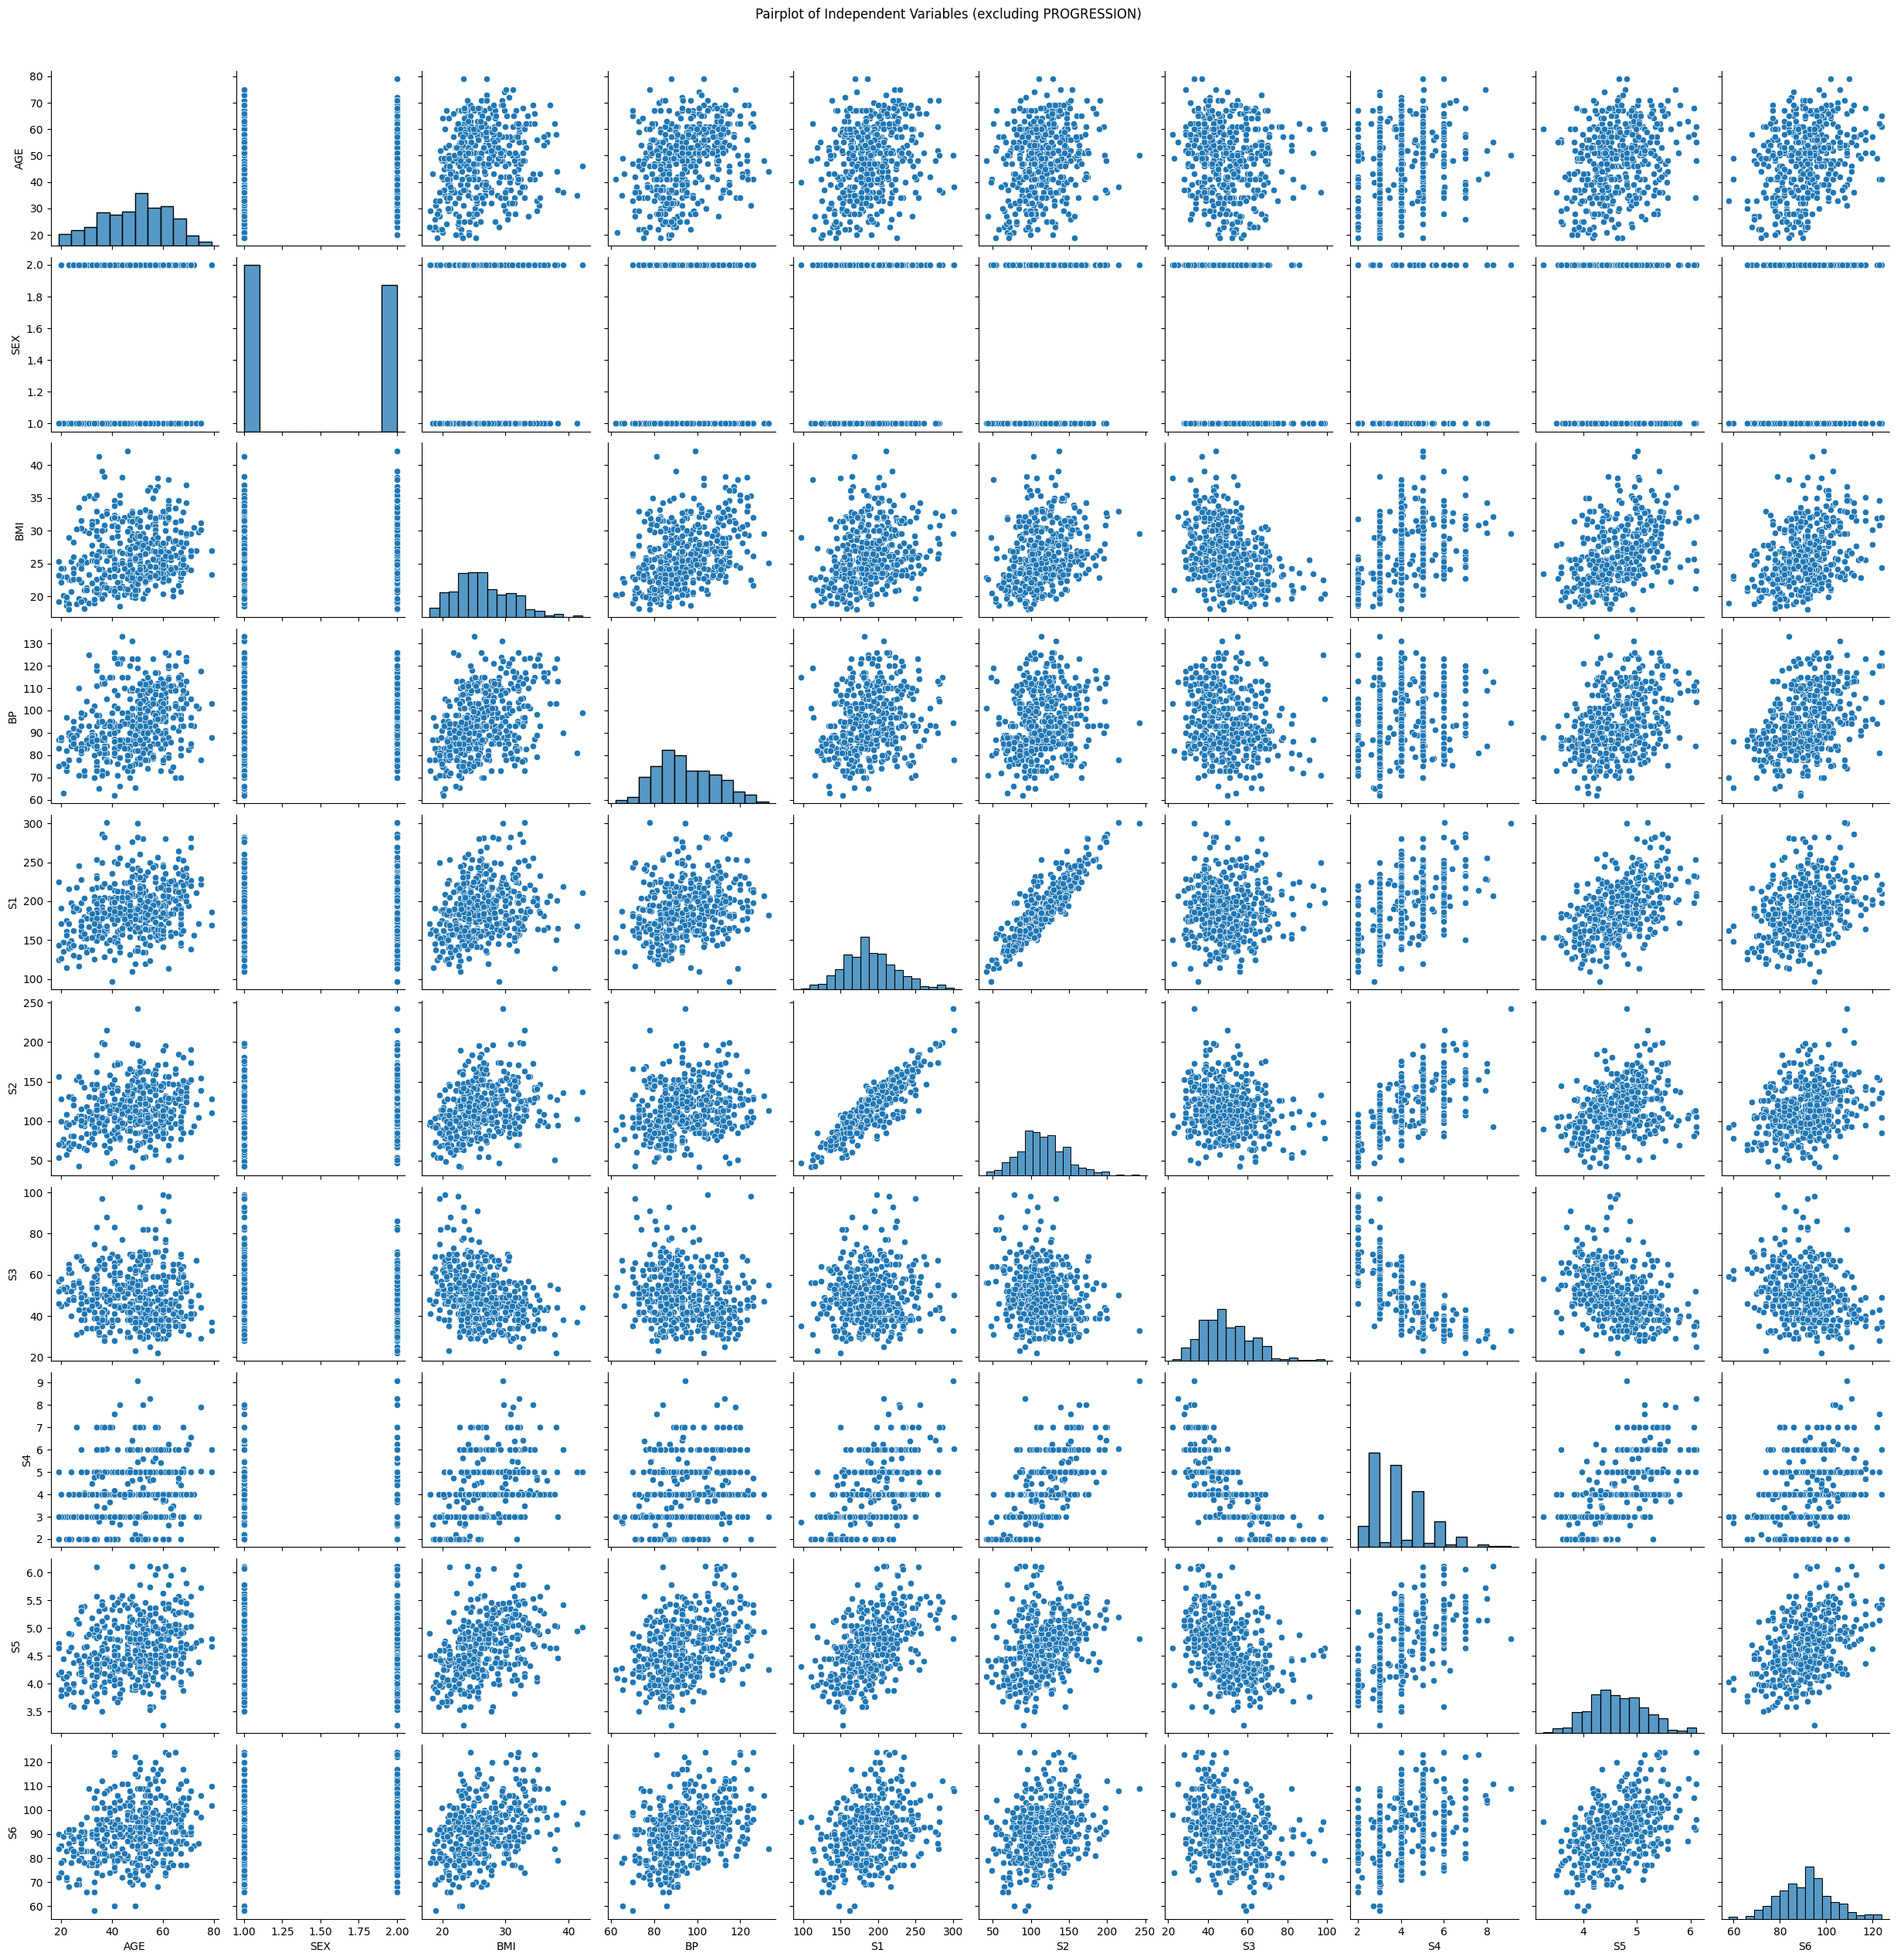

In [7]:
# Plot the distribution of the data (PROGRESSION excluded for this visualisation)
sns.pairplot(data=diabetes_df.drop(columns=['PROGRESSION']))

# Show the plot
plt.suptitle('Pairplot of Independent Variables (excluding PROGRESSION)', y=1.02)
plt.show()

**Step 3b: Initialise scalers and apply scaling to the dataset**

For now, we apply StandardScaler to all features as LinearRegression works well with standardized data.
Later, we could modify this to apply MinMaxScaler only to S4.

In [8]:
# Initialise scalers
standard_scaler = StandardScaler()

# Fit the scalers on training data and transform both training and test sets accordingly
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

**Scaling notes:**

- Looking at S4's distribution (from the pairplot), it seems non-Gaussian and potentially skewed, so investigation the use of MinMaxScaling might be worth it. I decided to use StandarScaling for all variables in this exercise because it is a safe default when you have mixed distributions, and you need a consistent scaling method across features.

- SEX is a categrocial variable, so scaling it (with either scaler) may not be meaningful because it is not a continuous feature.

# 4. Generate a multiple linear regression model using the training set. Use all of the independent variables.

In [9]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

# 5. Print out the intercept and coefficients of the trained model.

**Step 5: Output the intercept and coefficients**

This tells us the model's learned weights for each feature

In [10]:
print("Intercept:", lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: 147.7847025495751
Coefficients: [ -0.95567861 -12.89955019  24.0062771   15.36227276 -47.12832261
  29.63772795  10.58261516  12.38396033  38.62646575   3.59889203]


## 6. Generate predictions for the test set.

In [11]:
y_pred = lm.predict(X_test_scaled)

## 7. Compute R-squared for your model on the test set. You can use r2_score from sklearn.metrics to obtain this score.

In [12]:

# Compute R2 for the model on the test set
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 score on test set:", r2)

R2 score on test set: 0.4588389962630466


**R2 notes:**

R2 score measures how much variance in PROGRESSION is explained by our model

R2 of `0.4588` means the model explains `45.88%` of the variance.
- A value of `1` is perfect prediction; a value close to `0` means poor predictive power.
- `0.4588` means `45.88%` of variance is explained, which is moderate for a simple linear model.

## Extra:

I have included a visualisation of the errors just to practice it a bit more, since I found it a bit more challenging. Especially the creation of line coordinates.

These error bar plots help visualise how well the model predicts across different values of each feature.
- Larger red error bars indicate higher prediction errors.
- Consistently small errors suggest better model performance in that feature dimension.

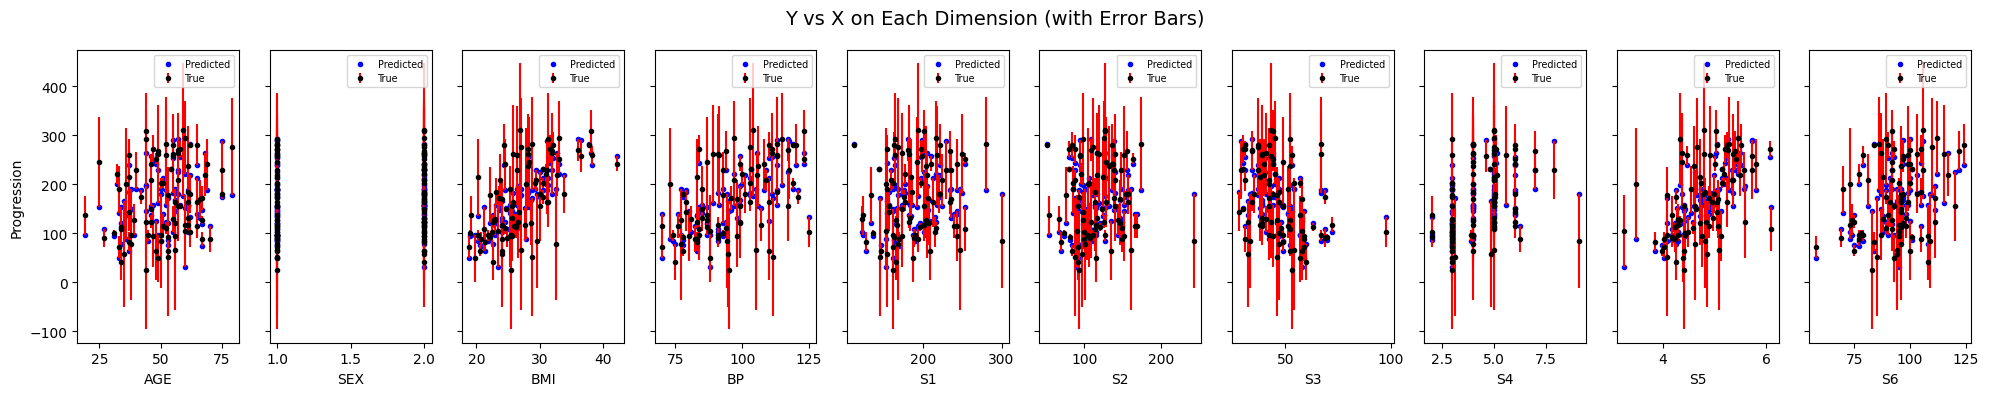

In [15]:
# Convert X_test and y_test to NumPy arrays
X_test_array = X_test.values
y_test_array = y_test.values
y_pred_array = y_pred

# Create line coordinates for illustration
X_line = np.empty(X_test_array.shape)
for i in range(X_test_array.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test_array[:, i]), np.max(X_test_array[:, i]), num=X_test_array.shape[0])

y_line = lm.predict(X_line)

# Plot the errors across each feature dimension
fig, ax = plt.subplots(1, X_test_array.shape[1], sharey=True, sharex=False, figsize=(20, 4))
fig.suptitle("Y vs X on Each Dimension (with Error Bars)", fontsize=14)
ax[0].set_ylabel('Progression')

# Calculate absolute errors for error bars
error_bar_values = np.abs(y_test_array - y_pred_array)

# Plot data, predicted values, and error bars for each feature
for i in range(X_test_array.shape[1]):
    ax[i].errorbar(
        X_test_array[:, i],
        y_test_array,
        yerr=error_bar_values,
        fmt='.k',
        ecolor='red',
        label='True'
    )
    ax[i].scatter(
        X_test_array[:, i],
        y_pred_array,
        c='blue',
        marker='.',
        label='Predicted'
    )
    
    # Label the x-axis
    ax[i].set_xlabel(X_test.columns[i])
    ax[i].legend(loc='best', fontsize='x-small')

plt.tight_layout()
plt.show()


## 8. Ensure your Notebook includes comments about what your code is accomplishing and notes about model outputs such as R-squared.

- We trained a Multiple Linear Regression model to predict diabetes progression.
- Applied `StandardScaler` to standardise feature scales, ensuring balanced contribution.
- The model achieved an R2 score of 0.45, explaining approximately 45% of the variance in diabetes progression.
- Error bar plots revealed areas where predictions were less accurate, suggesting potential for improvement.